<a href="https://colab.research.google.com/github/Adarsh5511/DS/blob/main/CaseStudyCredt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd

df=pd.read_excel('/content/default_of_credit_card_clients__courseware_version_1_21_19 (1).xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [106]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [107]:
df.shape

(30000, 25)

In [108]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['ID', 'PAY_1'], dtype='object')


In [109]:
df['ID'].nunique()

29687

In [110]:
mask=(df==0)
feature_zero_mask = mask.iloc[:, 1:].all(axis=1)
df_clean_1 = df.loc[~feature_zero_mask].copy()
df_clean_1.shape

(29685, 25)

In [111]:
df_clean_1['ID'].nunique()

29685

In [112]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [116]:
df_clean_1['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
Not available,3021
-2,2476
2,2378
3,292
4,63
5,23


In [117]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [119]:
valid_pay_1_mask.value_counts()

,count
PAY_1,
True,26664
False,3021


In [120]:
sum(valid_pay_1_mask)

26664

In [122]:
valid_pay_1_mask.head()

,PAY_1
0,True
1,True
2,True
3,True
4,True


In [125]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [126]:
 df_clean_2['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
-2,2476
2,2378
3,292
4,63
5,23
8,17


In [127]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [129]:
df_clean_2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [133]:
df_clean_2['SEX'].value_counts()

,count
SEX,
2,16080
1,10584


In [128]:
import matplotlib.pyplot as plt

Counts (Heights of bars): [10584.     0.     0.     0.     0.     0.     0.     0.     0. 16080.]
Bins (Edges of bars): [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


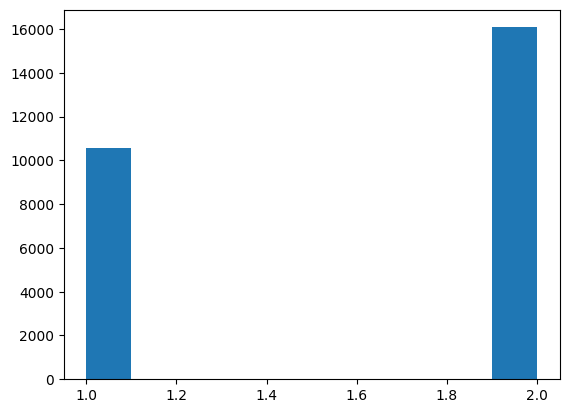

In [134]:
import matplotlib.pyplot as plt

# Generate the histogram and store the values
counts, bins, patches = plt.hist(df_clean_2['SEX'])

# Print the exact heights of bars (counts)
print("Counts (Heights of bars):", counts)

# Print the bin edges
print("Bins (Edges of bars):", bins)

# Show the histogram
plt.show()


In [141]:
df_clean_2['EDUCATION'].value_counts()


array([2, 1, 3, 5, 4, 6, 0])

(array([1.1000e+01, 9.4120e+03, 0.0000e+00, 1.2458e+04, 0.0000e+00,
        4.3800e+03, 1.1500e+02, 0.0000e+00, 2.4500e+02, 4.3000e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

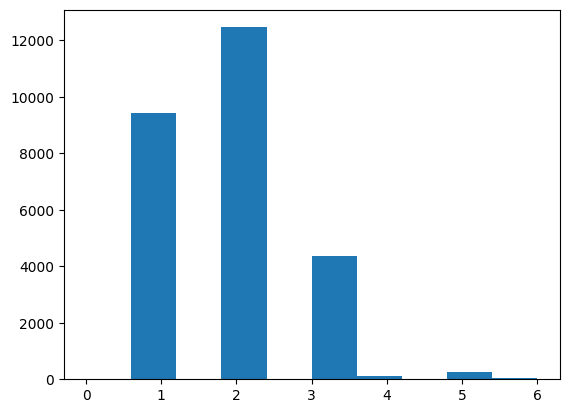

In [135]:
plt.hist(df_clean_2['EDUCATION'])

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64


(array([   48.,     0.,     0., 12172.,     0.,     0., 14158.,     0.,
            0.,   286.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

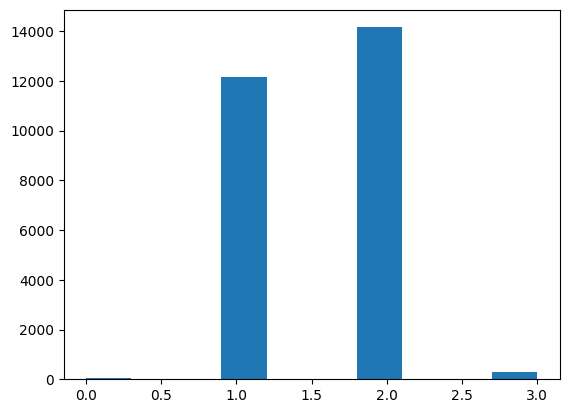

In [145]:
print(df_clean_2['MARRIAGE'].value_counts())
plt.hist(df_clean_2['MARRIAGE'])

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

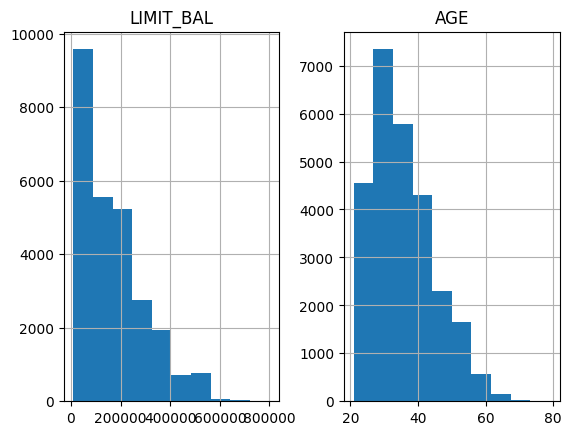

In [146]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [147]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [148]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6],\
                                value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

<ipython-input-148-796733c3f8c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6],\


,count
EDUCATION,
2,12458
1,9412
3,4380
4,414


In [149]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, \
                               inplace=True)
df_clean_2['MARRIAGE'].value_counts()

<ipython-input-149-f5f56ced7932>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, \


,count
MARRIAGE,
2,14158
1,12172
3,334
